# Random Forest - 분류

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정
* iris.csv

In [5]:
import seaborn as sns

DF = sns.load_dataset('iris')

* pandas DataFrame

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [9]:
DF.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

> ## 2) 분포 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'species', data = DF)
plt.show()

# II. Data Preprocessing

> ## 1) Data Set

In [11]:
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

> ## 2) Train & Test Split

* 7 : 3

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


# III. Modeling

> ## 1) Train_Data로 모델 생성

* random_state : 반복 실행 시 동일한 결과 출력
* n_jobs : 모든 CPU 코어 사용

In [13]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 2,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10, n_jobs=-1,
                       random_state=2045)

* Colab CPU check

In [14]:
!cat /proc/cpuinfo | grep 'model name'

model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
model name	: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz


> ## 2) Test_Data에 Model 적용

In [15]:
y_hat = Model_rf.predict(X_test)

> ## 3) Model Evaluate

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


In [17]:
print(accuracy_score(y_test, y_hat))

0.9555555555555556


> ## 4) Feature Importance

* Feature Importance 값 확인

In [18]:
Model_rf.feature_importances_

array([0.1571031 , 0.03897972, 0.45102744, 0.35288974])

* Feature Importance 시각화

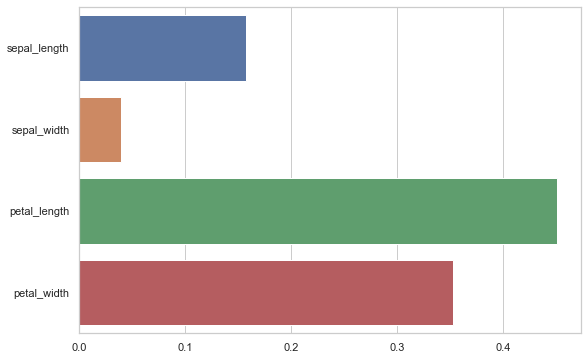

In [20]:
%matplotlib inline
plt.figure(figsize = (9, 6))
sns.barplot(Model_rf.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# IV. Hyperparameter Tuning

* n_estimators : 모델에 사용되는 의사결정나무의 개수
* max_features : 분할에 사용되는 Feature의 개수
* max_depth : 트리모델의 최대 깊이를 지정
* max_leaf_nodes : 말단 노드의 최대 개수
* min_samples_split : 분할을 위한 최소한의 샘플데이터 개수
* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수

> ## 1) RandomForestClassifier 객체 생성

In [21]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier()

> ## 2) GridSearchCV Hyperparameters 설정

In [22]:
params = {'n_estimators':[100, 300, 500, 700],
          'max_features':[1, 2, 3, 4],
          'max_depth':[1, 2, 3, 4, 5],
          'random_state':[2045]}

> ## 3) GridSearchCV 객체 생성

 * 5-Fold Cross Validation

In [23]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'accuracy',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)

> ## 4) GridSearchCV 수행

* 약 3분

In [25]:
from datetime import datetime

start_time = datetime.now()

grid_cv.fit(X_train, y_train)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:02:35.834213


> ## 5) 최적 Hyperparameter 확인

* Best Accuracy

In [ ]:
grid_cv.best_score_ 

* Best Hyperparameter

In [ ]:
grid_cv.best_params_

> ## 6) 최적 모델 생성 및 평가

* Best Model

In [ ]:
Model_CV = grid_cv.best_estimator_ 

* Evaluation

In [ ]:
y_hat = Model_CV.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat))

In [ ]:
print(accuracy_score(y_test, y_hat))

# 
# 
# 
# The End
# 
# 
# 